<a href="https://colab.research.google.com/github/Haderob/Handwritten-Digit-Classification/blob/main/MNIST_Handwritten_Digit_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MINIST data


In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data= 60,000 images 

Tast data = 10,000

Image dimension 28*28

grayscale image

In [ ]:
 #print the 10th image
 print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
X_train[10].shape

(28, 28)

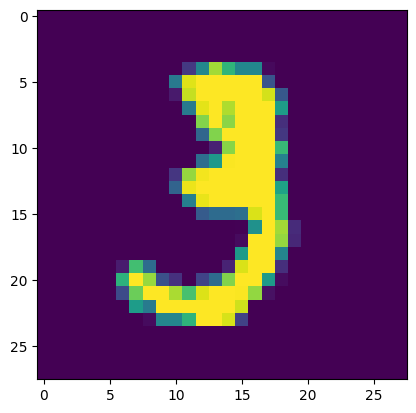

3


In [ ]:
# conver to image
plt.imshow(X_train[10])
plt.show()

#print the corosponding teble
print(Y_train[10])

In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


 can use these labels as such or we can also apply One Hot Encoding

In [ ]:
# scaling the values(Normalization) or standard scaling

X_train = X_train/255
X_test = X_test/255

In [ ]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Meural Network

history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 14s 7ms/step - loss: 0.3069 - accuracy: 0.9131 - val_loss: 0.1315 - val_accuracy: 0.9627
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1387 - accuracy: 0.9590 - val_loss: 0.1107 - val_accuracy: 0.9662
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1038 - accuracy: 0.9686 - val_loss: 0.1076 - val_accuracy: 0.9665
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0821 - accuracy: 0.9751 - val_loss: 0.0984 - val_accuracy: 0.9707
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0695 - accuracy: 0.9777 - val_loss: 0.0907 - val_accuracy: 0.9750
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.1201 - val_accuracy: 0.9670
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0.1168 - val_accuracy

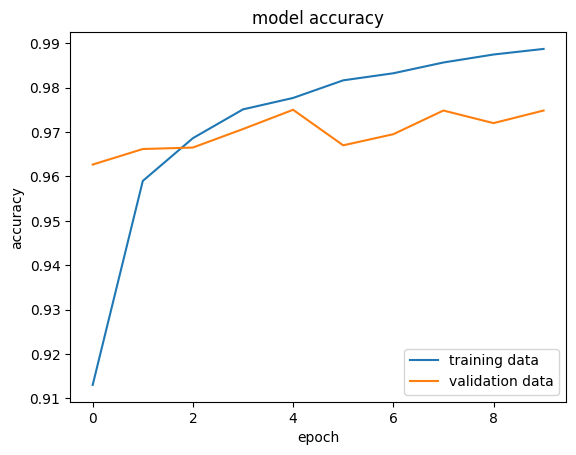

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

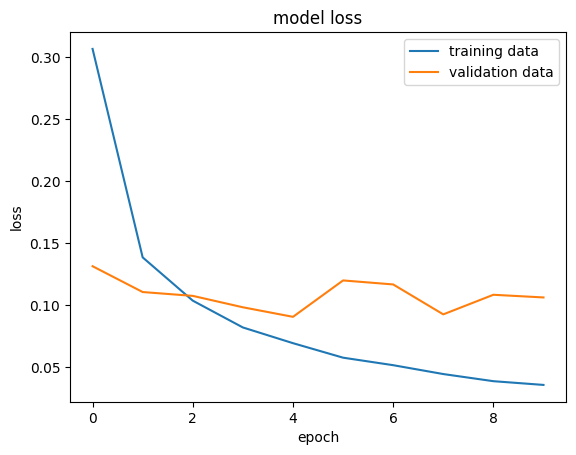

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9722
0.9721999764442444


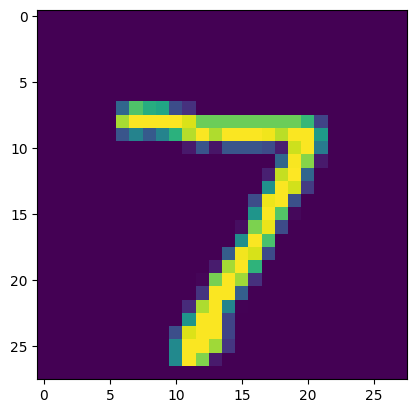

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


it gives 10 probabilities for one image like

[0.3,0.4,0.9,0.8,...,0.4] Then the highst probabliy will be the best prediction


In [ ]:
print(Y_pred[7])

[1.9074623e-06 1.9504119e-02 3.5595115e-02 2.3492219e-01 8.7479997e-01
 1.1060425e-01 1.6236049e-07 3.5277259e-02 5.1972175e-01 9.9973392e-01]


In [ ]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 967    0    2    2    0    3    3    0    1    2]
 [   0 1119    2    3    0    0    2    1    8    0]
 [   4    1 1002    9    0    1    2    3    9    1]
 [   0    0    3  986    0    9    1    4    4    3]
 [   0    2    8    0  937    3    4    2    4   22]
 [   1    0    2    9    0  870    3    0    5    2]
 [   5    2    2    1    4    8  933    1    2    0]
 [   3    5   13    9    0    0    0  987    5    6]
 [   6    0    3    9    0    7    2    1  944    2]
 [   2    3    0    8    3    7    1    4    4  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

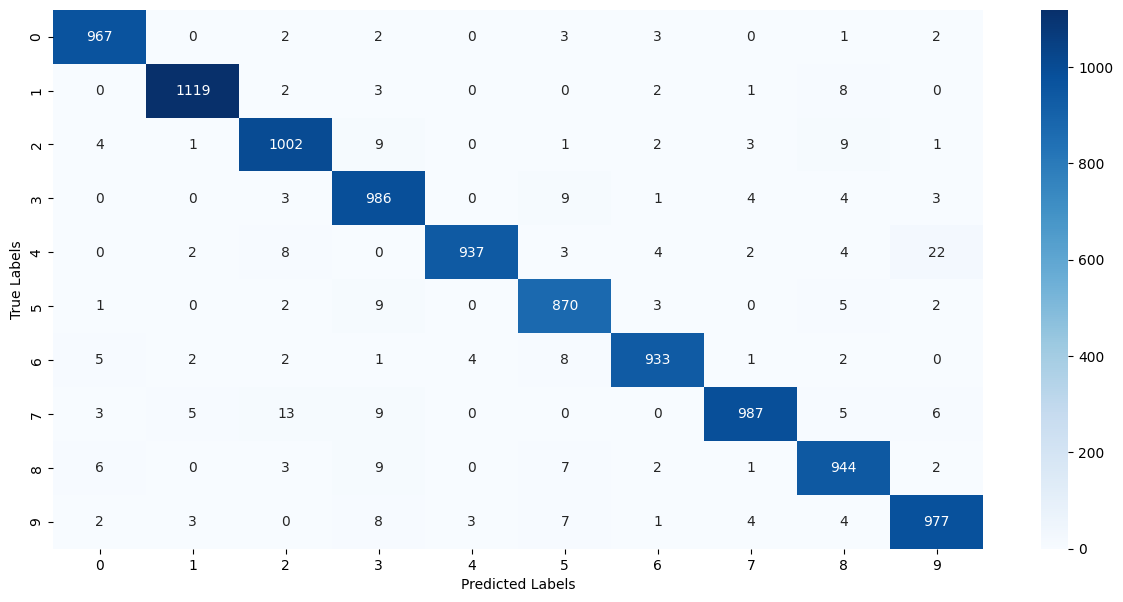

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues') # fmt is setting the values in intiger
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

# For number 3

In [ ]:
input_image_path = '/content/MNIST_3_0.png'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


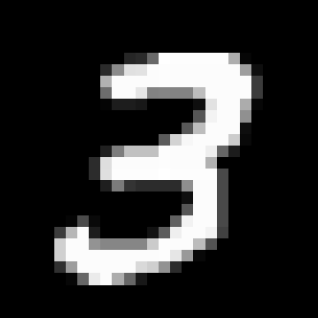

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

we should convert the image 
* to gray scale we can use PIL library or cv2 library

* to (28,28) size 

* the standardizethe data(Normalize the array by deviding to 225 as we did to the previous data

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY) # we used cv2 library

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255    # Normalizing

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped_new = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped_new)
print(input_prediction)

1/1 [==============================] - 0s 215ms/step
[[1.3356198e-02 1.2607710e-04 1.6666582e-04 1.0000000e+00 3.0413372e-22
  1.5248032e-01 3.4891035e-12 1.3343086e-07 1.5961090e-01 4.8811220e-02]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


#For number 7







In [ ]:
input_image_path7 = '/content/MNIST_7_0.png'

input_image = cv2.imread(input_image_path7)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[143 143 143]
  [110 110 110]
  [113 113 113]
  ...
  [113 113 113]
  [ 95  95  95]
  [195 195 195]]

 [[110 110 110]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [182 182 182]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 ...

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]]


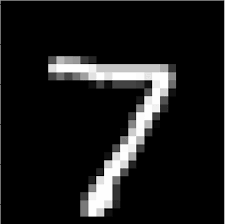

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(224, 225, 3)

we should convert the image 
* to gray scale we can use PIL library or cv2 library

* to (28,28) size 

* the standardizethe data(Normalize the array by deviding to 225 as we did to the previous data

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY) # we used cv2 library

In [ ]:
grayscale.shape

(224, 225)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255 # Normalizing

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped_new = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped_new)
print(input_prediction)

1/1 [==============================] - 0s 37ms/step
[[9.7806901e-02 1.8401161e-02 7.6804060e-01 7.4842745e-01 1.2538567e-09
  1.9708261e-01 1.0923529e-05 9.9995750e-01 8.4572442e-02 5.3138870e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

7


Path of the image to be predicted: /content/MNIST_3_0.png


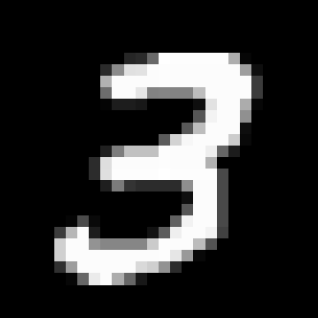

1/1 [==============================] - 0s 25ms/step
The Handwritten Digit is recognised as  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)